# Binary Classification with ScratchML Perceptron

In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

## Preprocess

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
%matplotlib inline  

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# extract only class labels 1's and zeroes for binary classification
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

In [5]:
# normalize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ScratchML Perceptron

## Train

In [6]:
from ScratchML import Perceptron

clf = Perceptron(learning_rate=0.05, n_iteration=10)
clf.fit(X_train_std, y_train)

100%|██████████| 10/10 [00:00<00:00, 53.80it/s]


Text(0,0.5,'loss')

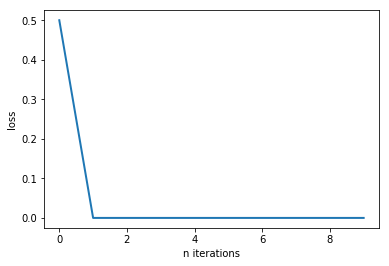

In [7]:
plt.plot(clf.loss, label='line 1', linewidth=2)
plt.xlabel('n iterations')
plt.ylabel('loss')

## Evaluate

In [8]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


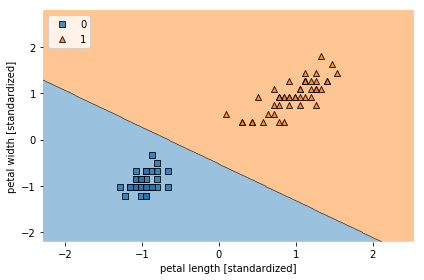

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Scikit-Learn Perceptron

## Train

In [10]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train_std, y_train)

/Users/mikePro/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## Evaluate

In [11]:
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


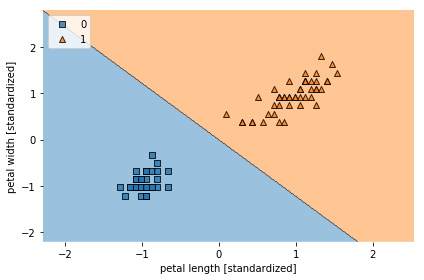

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()